## Clone repository

In [ ]:
![ -d cnn_txf_bias ] || git clone https://github.com/shikhartuli/cnn_txf_bias.git
%cd cnn_txf_bias
%ls

Cloning into 'cnn_txf_bias'...
remote: Enumerating objects: 617, done.
remote: Counting objects: 100% (617/617), done.
remote: Compressing objects: 100% (462/462), done.
remote: Total 3091 (delta 278), reused 428 (delta 127), pack-reused 2474
Receiving objects: 100% (3091/3091), 174.67 MiB | 59.38 MiB/s, done.
Resolving deltas: 100% (609/609), done.
Checking out files: 100% (6007/6007), done.
/content/cnn_txf_bias
big_transfer		      error-consistency  texture-vs-shape
CNN_vs_Human.pdf	      README.md		 vision_transformer
COS_454_Project_Proposal.pdf  simclr
COS_454_Project_Report.pdf    tests


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os

%cd error-consistency/raw-data_new/texture-shape_cue-conflict

## Generate Human confusion matrices

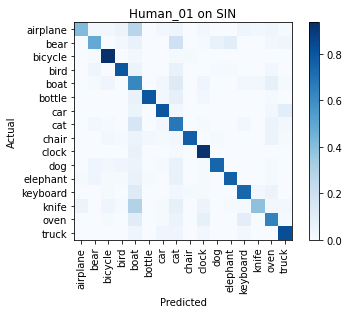

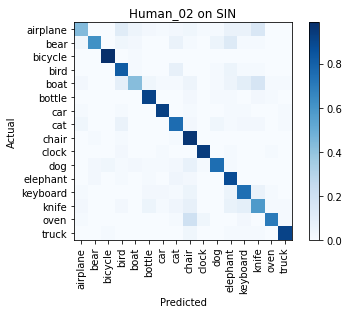

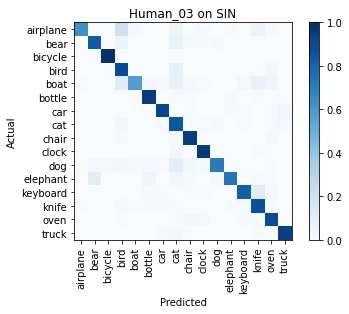

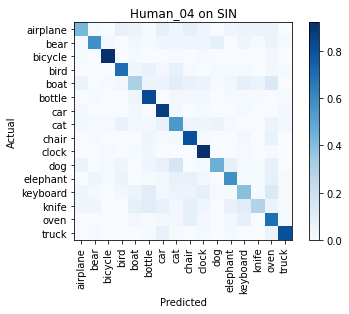

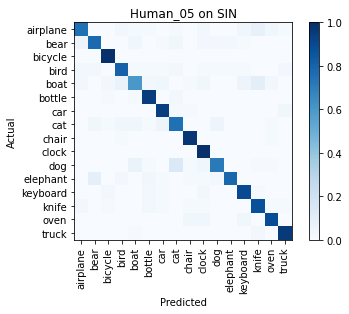

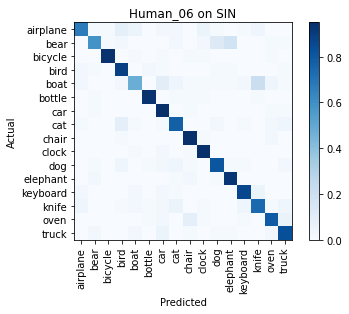

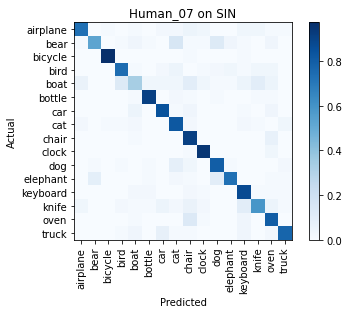

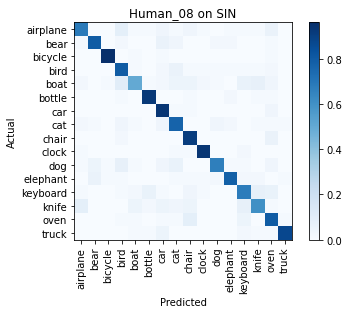

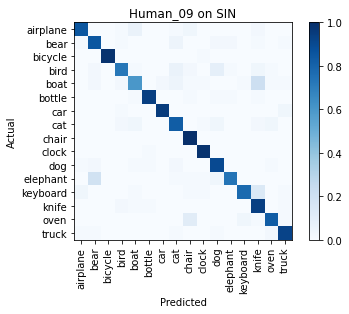

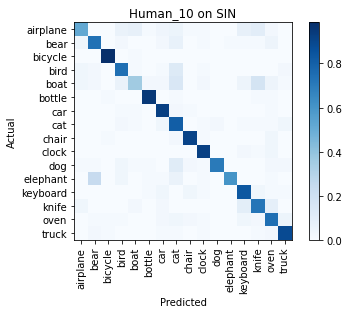

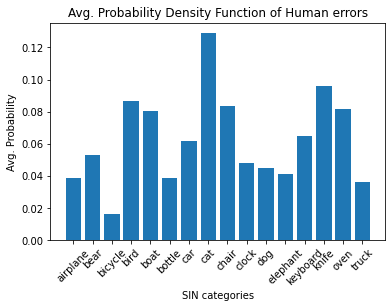

In [42]:
categories_SIN = os.listdir('../../../texture-vs-shape/stimuli/style-transfer-preprocessed-512/')
categories_SIN.sort()

pdf_list = []

for sub in range(1, 11):
  str_sub = '0'+str(sub) if sub < 10 else str(sub)
  human_csv = pd.read_csv(f'./texture-shape_cue-conflict_subject-{str_sub}_session_1.csv')
  pred = human_csv['object_response']
  true = human_csv['category']

  cm = confusion_matrix(true, pred, labels = categories_SIN)
  cm_norm = confusion_matrix(true, pred, labels = categories_SIN, normalize = 'true')

  cm_errors = np.copy(cm)
  np.fill_diagonal(cm_errors, 0)
  pdf_errors = np.sum(cm_errors, axis = 0)
  pdf_errors = np.divide(pdf_errors, np.sum(pdf_errors))
  pdf_list.append(pdf_errors)

  fig, ax = plt.subplots()
  plt.imshow(cm_norm, cmap = 'Blues')
  plt.title(f'Human_{str_sub} on SIN')
  plt.colorbar()
  ax.set_xticks(np.arange(16))
  ax.set_yticks(np.arange(16))
  ax.set_xticklabels(categories_SIN, rotation=90)
  ax.set_yticklabels(categories_SIN)
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')

pdf_avg = np.zeros_like(pdf_errors)
for i in range(len(pdf_list)):
  pdf_avg += pdf_list[i]
pdf_avg = np.divide(pdf_avg, len(pdf_list))

fig = plt.figure()
plt.bar(categories_SIN, pdf_avg)
plt.xticks(rotation = 45)
plt.xlabel('SIN categories')
plt.ylabel('Avg. Probability')
plt.title('Avg. Probability Density Function of Human errors')
plt.show()

## Define distance metric

In [47]:
def kl_distance(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

## Generate ViT confusion matrices

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


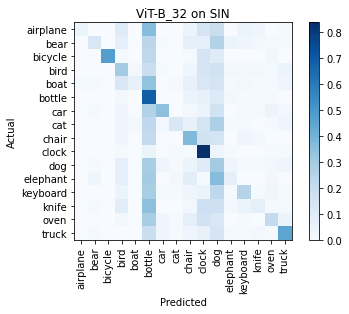

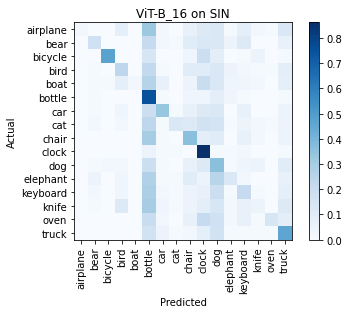

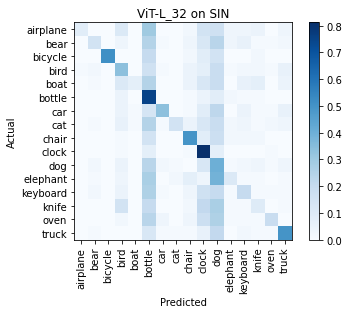

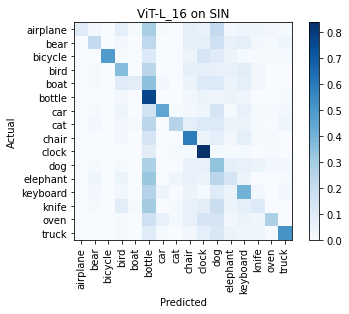

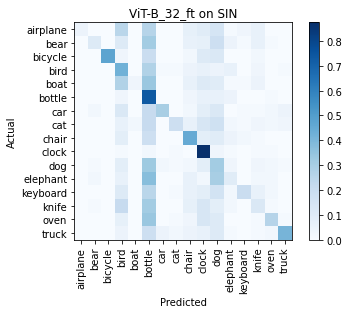

In [59]:
vit_models = ['B_32', 'B_16', 'L_32', 'L_16', 'B_32_ft']

kl_dist = {}
acc_SIN = {}

for model in vit_models:
  vit_csv = pd.read_csv(f'./texture-shape_cue-conflict_ViT-{model}_session-1.csv')
  pred = vit_csv['object_response']
  true = vit_csv['category']

  cm = confusion_matrix(true, pred, labels = categories_SIN)
  cm_norm = confusion_matrix(true, pred, labels = categories_SIN, normalize = 'true')

  cm_errors = np.copy(cm)
  np.fill_diagonal(cm_errors, 0)
  pdf_errors = np.sum(cm_errors, axis = 0)
  pdf_errors = np.divide(pdf_errors, np.sum(pdf_errors))
  kl_dist[f'ViT-{model}'] = kl_distance(pdf_errors, pdf_avg)
  acc_SIN[f'ViT-{model}'] = accuracy_score(true, pred)

  fig, ax = plt.subplots()
  plt.imshow(cm_norm, cmap = 'Blues')
  plt.title(f'ViT-{model} on SIN')
  plt.colorbar()
  ax.set_xticks(np.arange(16))
  ax.set_yticks(np.arange(16))
  ax.set_xticklabels(categories_SIN, rotation=90)
  ax.set_yticklabels(categories_SIN)
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')

## Generate ResNet confusion matrices

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


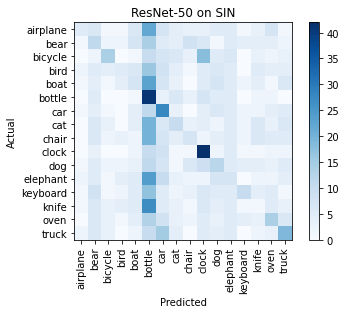

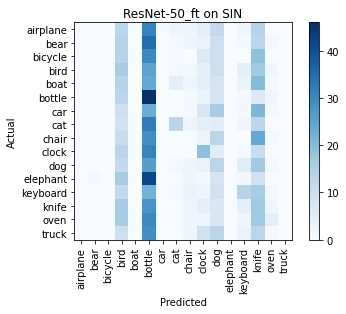

In [60]:
resnet_models = ['resnet50', 'resnet50_ft']

for model in resnet_models:
  resnet_csv = pd.read_csv(f'./texture-shape_cue-conflict_{model}_session-1.csv')
  pred = resnet_csv['object_response']
  true = resnet_csv['category']

  cm = confusion_matrix(true, pred, labels = categories_SIN)
  cm_norm = confusion_matrix(true, pred, labels = categories_SIN, normalize = 'true')

  cm_errors = np.copy(cm)
  np.fill_diagonal(cm_errors, 0)
  pdf_errors = np.sum(cm_errors, axis = 0)
  pdf_errors = np.divide(pdf_errors, np.amax(pdf_errors))
  kl_dist[f'ResNet-50{model[8:]}'] = kl_distance(pdf_errors, pdf_avg)
  acc_SIN[f'ResNet-50{model[8:]}'] = accuracy_score(true, pred)

  fig, ax = plt.subplots()
  plt.imshow(cm, cmap = 'Blues')
  plt.title(f'ResNet-50{model[8:]} on SIN')
  plt.colorbar()
  ax.set_xticks(np.arange(16))
  ax.set_yticks(np.arange(16))
  ax.set_xticklabels(categories_SIN, rotation=90)
  ax.set_yticklabels(categories_SIN)
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')

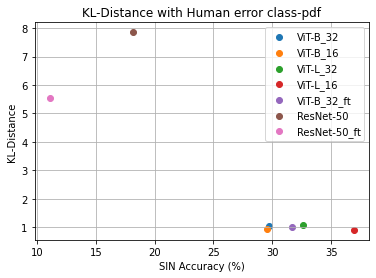

In [61]:
for model in kl_dist.keys():
  plt.scatter(acc_SIN[model]*100, kl_dist[model], label = model)

plt.grid()
plt.xlabel(f'SIN Accuracy (%)')
plt.ylabel('KL-Distance')
plt.title(f'KL-Distance with Human error class-pdf')
plt.legend()
plt.show()